# Extract vertical grid from Glorys

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#path_in = '/glade/scratch/bryan/g.e20.G.TL319_t13.control.001_hfreq/ocn/proc/tavg/'
fname = '/glade/scratch/gseijo/glorys/glorys_20191231.nc'
ds = xr.open_dataset(fname)
ds.depth

<xarray.DataArray 'depth' (depth: 75)>
array([5.057600e-01, 1.555855e+00, 2.667682e+00, 3.856280e+00, 5.140361e+00,
       6.543034e+00, 8.092519e+00, 9.822750e+00, 1.177368e+01, 1.399104e+01,
       1.652532e+01, 1.942980e+01, 2.275762e+01, 2.655830e+01, 3.087456e+01,
       3.574020e+01, 4.118002e+01, 4.721189e+01, 5.385064e+01, 6.111284e+01,
       6.902168e+01, 7.761116e+01, 8.692943e+01, 9.704131e+01, 1.080303e+02,
       1.200000e+02, 1.330758e+02, 1.474062e+02, 1.631645e+02, 1.805499e+02,
       1.997900e+02, 2.211412e+02, 2.448906e+02, 2.713564e+02, 3.008875e+02,
       3.338628e+02, 3.706885e+02, 4.117939e+02, 4.576256e+02, 5.086399e+02,
       5.652923e+02, 6.280260e+02, 6.972587e+02, 7.733683e+02, 8.566790e+02,
       9.474479e+02, 1.045854e+03, 1.151991e+03, 1.265861e+03, 1.387377e+03,
       1.516364e+03, 1.652568e+03, 1.795671e+03, 1.945296e+03, 2.101027e+03,
       2.262422e+03, 2.429025e+03, 2.600380e+03, 2.776039e+03, 2.955570e+03,
       3.138565e+03, 3.324641e+03, 3.513446e+03, 3.704657e+03, 3.897982e+03,
       4.093159e+03, 4.289953e+03, 4.488155e+03, 4.687581e+03, 4.888070e+03,
       5.089479e+03, 5.291683e+03, 5.494575e+03, 5.698061e+03, 5.902058e+03],
      dtype=float32)
Coordinates:
  * depth    (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time     datetime64[ns] ...
Attributes:
    valid_min:      0.50576
    valid_max:      5902.058
    units:          m
    positive:       down
    unit_long:      Meters
    long_name:      Depth
    standard_name:  depth
    axis:           Z
    _ChunkSizes:    75

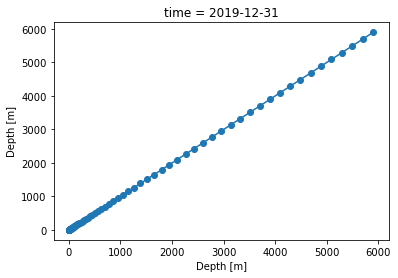

In [3]:
ds.depth.plot(marker='o')

## Define the resolution dz(z)

In [4]:
dz = np.zeros(ds.depth.shape)

In [5]:
dz[0] = 2.0 * ds.depth[0]
print('depth = {}; dz = {}'.format(ds.depth[0].values, dz[0]))
for k in range(1,len(dz)):
    dz[k] = 2.0 * (ds.depth[k] - dz[0:k].sum())
    print('depth = {}; dz = {}'.format(ds.depth[k].values, dz[k]))

depth = 0.5057600140571594; dz = 1.0115200281143188
depth = 1.5558550357818604; dz = 1.088670015335083
depth = 2.667681932449341; dz = 1.134983777999878
depth = 3.8562800884246826; dz = 1.2422125339508057
depth = 5.1403608322143555; dz = 1.32594895362854
depth = 6.543034076690674; dz = 1.4793975353240967
depth = 8.09251880645752; dz = 1.6195719242095947
depth = 9.822750091552734; dz = 1.840890645980835
depth = 11.773679733276367; dz = 2.0609686374664307
depth = 13.991040229797363; dz = 2.3737523555755615
depth = 16.525320053100586; dz = 2.694807291030884
depth = 19.429800033569336; dz = 3.114152669906616
depth = 22.757619857788086; dz = 3.541486978530884
depth = 26.558300018310547; dz = 4.059873342514038
depth = 30.87455940246582; dz = 4.572645425796509
depth = 35.74020004272461; dz = 5.158635854721069
depth = 41.18001937866211; dz = 5.721002817153931
depth = 47.211891174316406; dz = 6.342740774154663
depth = 53.85063934326172; dz = 6.934755563735962
depth = 61.11283874511719; dz = 7.5

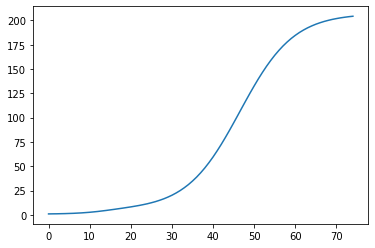

In [6]:
plt.plot(dz)

## Save netcdf file

In [7]:
from datetime import datetime 
now=datetime.now()
print(now)

path_out = '/glade/work/gmarques/Projects/regional_caribeean_cesm/input_files/'

dz_da = xr.DataArray(dz,
                     dims=["z"],
                     attrs={"units":"meter",
                            "long_name":"Nominal thickness of level",
                            "valid_min":str(np.min(dz)),
                            "valid_max":str(np.max(dz))})

ds_out = xr.Dataset()
ds_out['dz'] = dz_da
ds_out.attrs={'title':'Vertical layer thickness for Glorys - 75 layer z grid',
              'maximum_depth':str(np.sum(dz)),
              'author':'Gustavo Marques',
              'history':'Created '+str(now),
            }

ds_out

2022-10-06 11:54:29.537424


<xarray.Dataset>
Dimensions:  (z: 75)
Dimensions without coordinates: z
Data variables:
    dz       (z) float64 1.012 1.089 1.135 1.242 ... 202.6 203.2 203.8 204.2
Attributes:
    title:          Vertical layer thickness for Glorys - 75 layer z grid
    maximum_depth:  6004.171746373177
    author:         Gustavo Marques
    history:        Created 2022-10-06 11:54:29.537424

In [8]:
ds_out.to_netcdf(path_out+'vgrid_glorys.nc')

In [9]:
dz.sum()

6004.171746373177